# Ejemplo de un factor aleatorio

In [50]:
Telar<- c(rep(1,4),rep(2,4),rep(3,4),rep(4,4))

Resistencia del telar:

In [51]:
y<-c(98,97,99,96,91,90,93,92,96,95,97,95,95,96,99,98)

Hay que indicar que **Telar** es un factor categórico y aleatorio

In [52]:
##Para factores aleatorios
library(Matrix)

In [53]:
# Con GAD genera la tabla de ANOVA
######Hay que cargar la paqueteria GAD
library(GAD)

In [54]:
Telar<-as.factor(Telar)
Telar<- as.random (Telar)

Plantemos el modelo y aplicamos la función **gad** (General ANOVA Design):

In [55]:
modelo <- lm(y~Telar)
gad(modelo)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Telar,3,89.1875,29.729167,15.68132,0.000187792
Residual,12,22.7500,1.895833,NA,NA


Vemos que $p < 0.05$, así que al menos dos niveles de nuestro factor tienen diferencias significativas.

**Nota:** En un modelo de factores aleatorios no se hacen comparaciones múltiples, ya que no tiene sentido. Sin embargo es necesario calcular los componentes de la varianza.

## Estimando los componentes de la varianza 

In [56]:
library(lme4)

Planteamos un modelo linear de efectos mixtos (lmer)

In [57]:
m1<-lmer(y~(1|Telar)) # esta es la sintaxis para indicar que el factor es aleatorio

In [14]:
summary(m1)

Linear mixed model fit by REML ['lmerMod']
Formula: y ~ (1 | Telar)

REML criterion at convergence: 63.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.38018 -0.57260 -0.04342  0.82574  1.52491 

Random effects:
 Groups   Name        Variance Std.Dev.
 Telar    (Intercept) 6.958    2.638   
 Residual             1.896    1.377   
Number of obs: 16, groups:  Telar, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   95.438      1.363   70.01

La variación de los telares es casi 3 veces más grande que la variación de los errores, por lo que la variación del telar es significativa.

**Conclusión**: lo mejor es que se cambien los telares.

Vamos a representar en porcentajes los errores:

In [58]:
vars <- c(6.96,1.9)

In [59]:
#para sacar porcentajes
porcentajes<-100*vars/sum(vars)
porcentajes

[1] 78.5553 21.4447

In [64]:
porcentajes <- c(round(porcentajes[1],2),round(porcentajes[2],2))

Gráfica de pastel:

In [ ]:
install.packages('plotrix')

In [25]:
library(plotrix)

In [66]:
etiqueta<-paste(porcentajes,"%",sep = "")
colores<-c("purple","541")

Warning message in plot.window(...):
“"clockwise" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"clockwise" is not a graphical parameter”
Warning message in title(...):
“"clockwise" is not a graphical parameter”


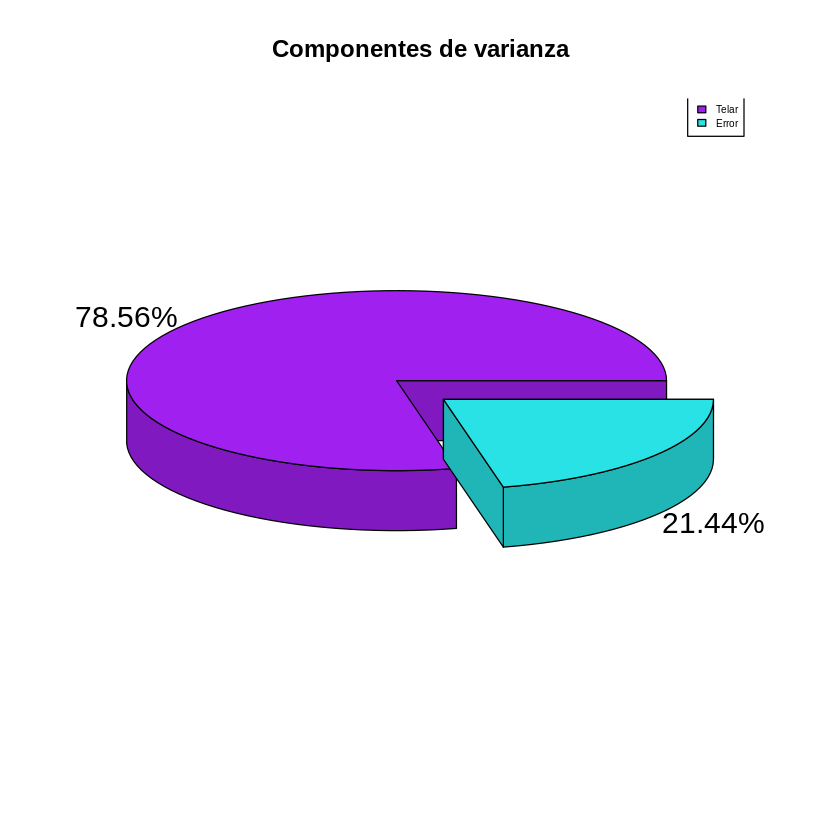

In [67]:
pie3D(porcentajes, labels = etiqueta,radius=0.9,explode=0.1,main="Componentes de varianza",clockwise=TRUE,col=colores)
#Leyenda
legend("topright",c("Telar","Error"),cex=0.5,fill=colores)

Otra forma de hacer la gráfica:

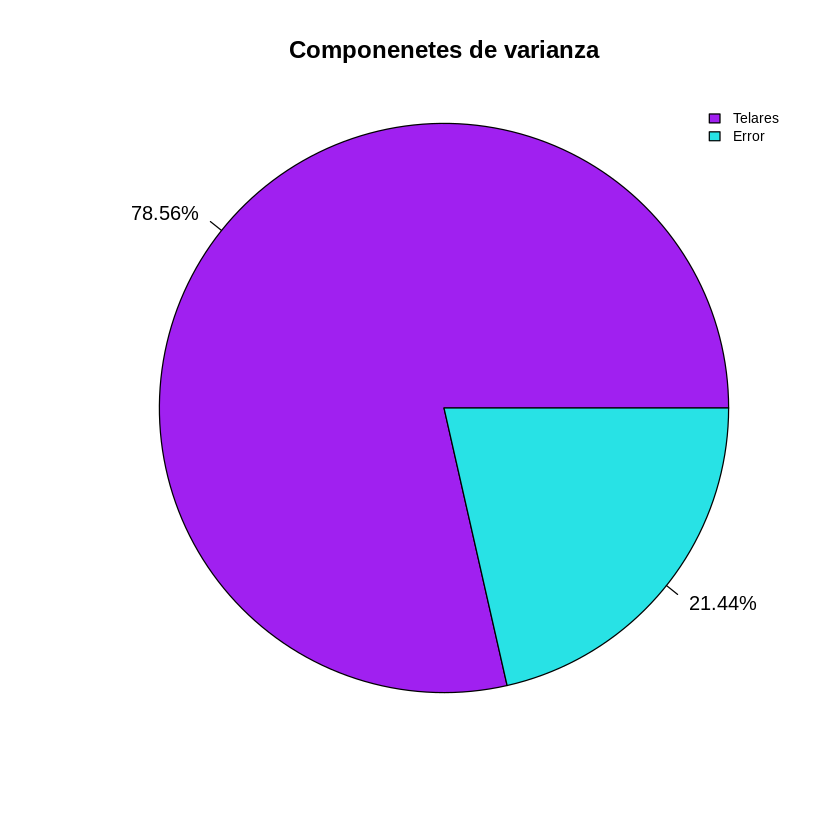

In [68]:
pie(porcentajes, labels=etiqueta, col=colores, radius = 1, main="Componenetes de varianza")
legend ("topright", c("Telares", "Error"), cex=.7, fill=colores, bty="n")

## Verificando los supuestos

1          2          3          4          5          6          7 
 0.6315259 -0.3684741  1.6315259 -1.3684741 -0.7510949 -1.7510949  1.2489051 
         8          9         10         11         12         13         14 
 0.2489051  0.2699282 -0.7300718  1.2699282 -0.7300718 -1.9003591 -0.9003591 
        15         16 
 2.0996409  1.0996409

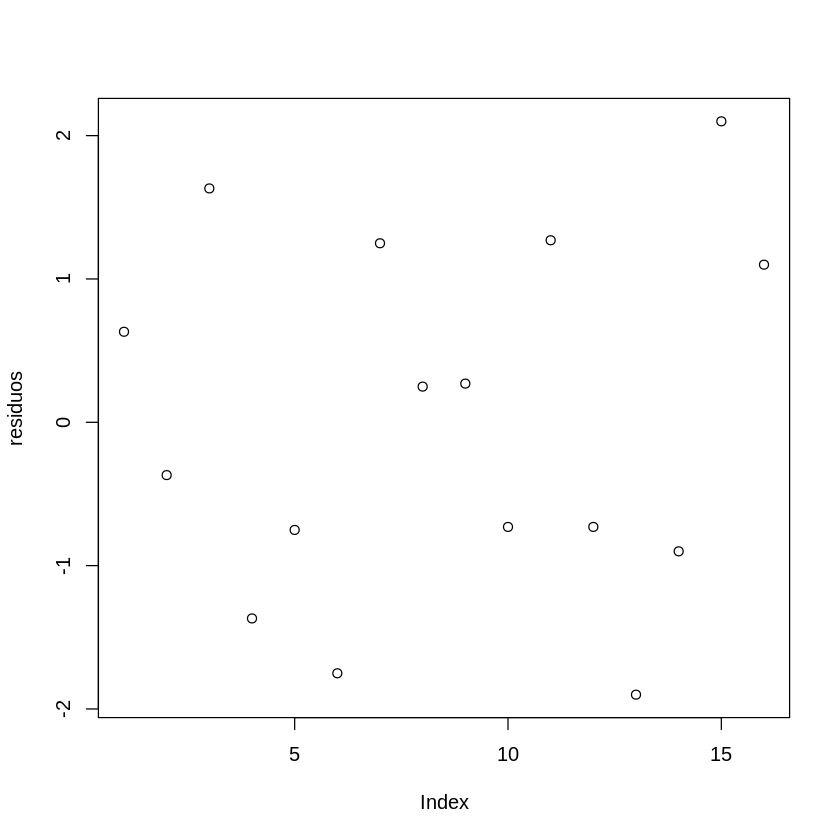

In [32]:
residuos<-residuals(m1)
residuos
plot(residuos)

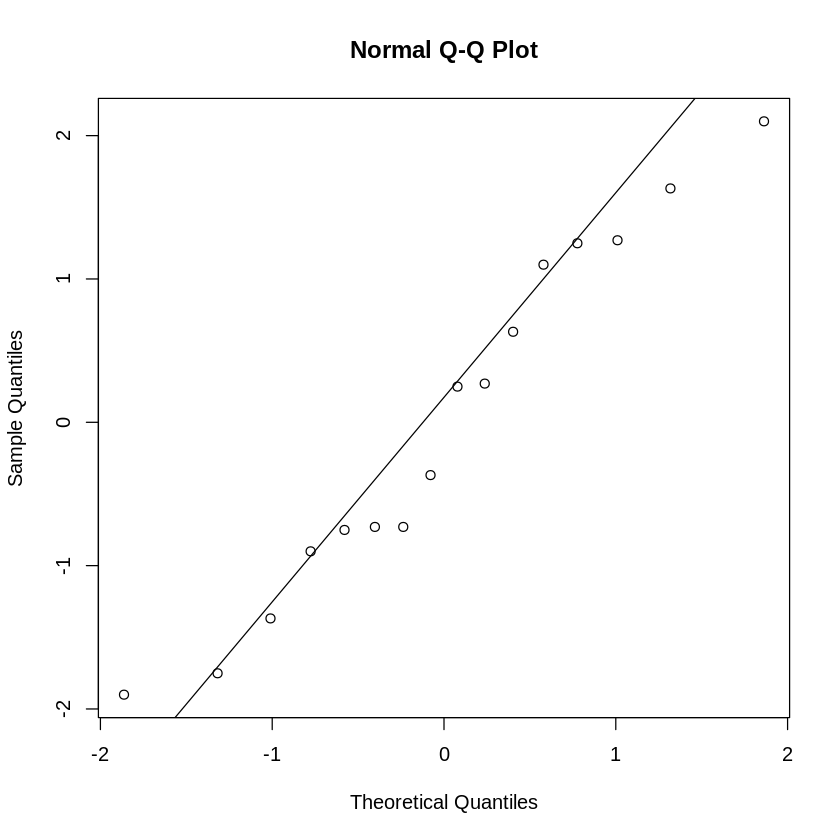

In [33]:
qqnorm(residuos)
qqline(residuos)

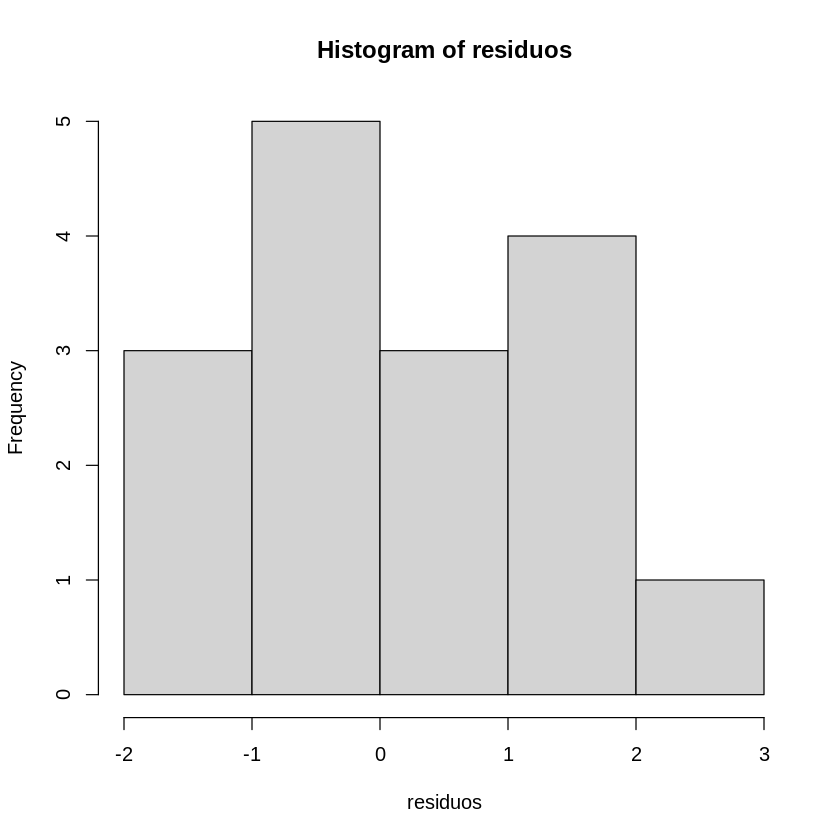

In [34]:
hist(residuos)

Prueba de normalidad:

In [35]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.95313, p-value = 0.5409


no se rechaza la hipótesis nula, por lo que los residuos tienen distribución normal.

Independencia entre los errores:

In [ ]:
library(tseries)

In [37]:
####Ho: No hay correlacion (prueba de rachas, para probar no correlacion de residuos)
runs.test(as.factor(modelo$residual>0))


	Runs Test

data:  as.factor(modelo$residual > 0)
Standard Normal = 0, p-value = 1
alternative hypothesis: two.sided
